In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("data/DB_bank.csv")
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFP
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [3]:
df["purpose"].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [4]:
df['purpose'].replace(['major_purchase','credit_card','small_business','educational','debt_consolidation','home_improvement','all_other'],[6,5,4,3,2,1,0],inplace=True)

In [5]:
df.dtypes

credit.policy          int64
purpose                int64
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
NFP                    int64
dtype: object

In [6]:
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
y[0:5], x[0:5]

(array([0, 0, 0, 0, 0], dtype=int64),
 array([[1.00000000e+00, 2.00000000e+00, 1.18900000e-01, 8.29100000e+02,
         1.13504065e+01, 1.94800000e+01, 7.37000000e+02, 5.63995833e+03,
         2.88540000e+04, 5.21000000e+01, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [1.00000000e+00, 5.00000000e+00, 1.07100000e-01, 2.28220000e+02,
         1.10821426e+01, 1.42900000e+01, 7.07000000e+02, 2.76000000e+03,
         3.36230000e+04, 7.67000000e+01, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [1.00000000e+00, 2.00000000e+00, 1.35700000e-01, 3.66860000e+02,
         1.03734912e+01, 1.16300000e+01, 6.82000000e+02, 4.71000000e+03,
         3.51100000e+03, 2.56000000e+01, 1.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [1.00000000e+00, 2.00000000e+00, 1.00800000e-01, 1.62340000e+02,
         1.13504065e+01, 8.10000000e+00, 7.12000000e+02, 2.69995833e+03,
         3.36670000e+04, 7.32000000e+01, 1.00000000e+00, 0.00000000e+00,
        

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, classification_report,mean_squared_error as mse
confusion_matrix_models = []
accuracy_score_models = []
f1_score_models = []
rmse_models = []

In [8]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, random_state=0, test_size=3/10)

In [9]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 40
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test, y_pred)
    std_acc[n-1] = np.std(y_pred == y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.74356298, 0.82324287, 0.8006263 , 0.82915797, 0.82115518,
       0.83298539, 0.82811413, 0.83298539, 0.83054976, 0.83298539,
       0.83124565, 0.83368128, 0.83020181, 0.83402923, 0.83298539,
       0.83542102, 0.83437717, 0.8368128 , 0.83507307, 0.83646486,
       0.83576896, 0.83611691, 0.8368128 , 0.8368128 , 0.83716075,
       0.83716075, 0.83716075, 0.83646486, 0.83611691, 0.83646486,
       0.83646486, 0.83646486, 0.8368128 , 0.83716075, 0.83716075,
       0.8375087 , 0.8375087 , 0.83716075, 0.8368128 ])

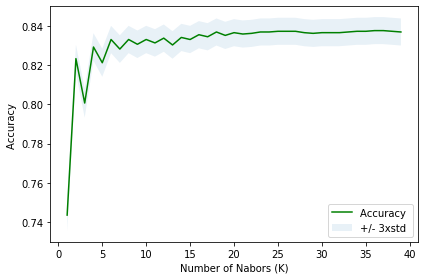

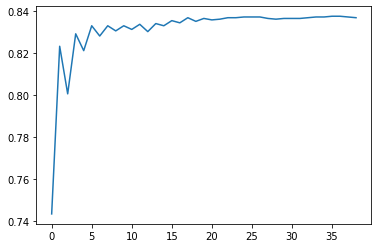

The best accuracy was with 0.837508698677801 with k= 36


In [11]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
plt.plot(mean_acc)
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [12]:
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(x_train, y_train)
y_pred = neigh.predict(x_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2406
           1       1.00      0.00      0.00       468

    accuracy                           0.84      2874
   macro avg       0.92      0.50      0.46      2874
weighted avg       0.86      0.84      0.76      2874



In [14]:
confusion_matrix_models.append(confusion_matrix(y_test, y_pred))

accuracy_score_models.append(accuracy_score(y_test, y_pred))

f1_score_models.append(f1_score(y_test, y_pred, average='weighted'))

rmse_models.append(np.sqrt(mse(y_pred, y_test)))

In [15]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)
y_pred = LR.predict(x_test)
yhat_prob = LR.predict_proba(x_test)
yhat_prob[0:5], y_pred[0:5]

(array([[0.85394432, 0.14605568],
        [0.84124891, 0.15875109],
        [0.79293487, 0.20706513],
        [0.74807248, 0.25192752],
        [0.54038133, 0.45961867]]),
 array([0, 0, 0, 0, 0], dtype=int64))

In [16]:
from sklearn.metrics import log_loss

log_loss(y_test, yhat_prob)

0.42508342956041595

In [17]:
confusion_matrix_models.append(confusion_matrix(y_test, y_pred))

accuracy_score_models.append(accuracy_score(y_test, y_pred))

f1_score_models.append(f1_score(y_test, y_pred, average='weighted'))

rmse_models.append(np.sqrt(mse(y_pred, y_test)))

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2406
           1       0.22      0.01      0.02       468

    accuracy                           0.83      2874
   macro avg       0.53      0.50      0.46      2874
weighted avg       0.74      0.83      0.76      2874



In [19]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

y_pred = clf.predict(x_test)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [20]:
confusion_matrix_models.append(confusion_matrix(y_test, y_pred))

accuracy_score_models.append(accuracy_score(y_test,y_pred))

f1_score_models.append(f1_score(y_test, y_pred, average='weighted'))

rmse_models.append(np.sqrt(mse(y_pred, y_test)))

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2406
           1       0.67      0.00      0.01       468

    accuracy                           0.84      2874
   macro avg       0.75      0.50      0.46      2874
weighted avg       0.81      0.84      0.76      2874



In [22]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [23]:
confusion_matrix_models.append(confusion_matrix(y_test, y_pred))

accuracy_score_models.append(accuracy_score(y_test, y_pred))

f1_score_models.append(f1_score(y_test, y_pred, average='weighted'))

rmse_models.append(np.sqrt(mse(y_pred, y_test)))

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2406
           1       0.30      0.22      0.25       468

    accuracy                           0.79      2874
   macro avg       0.58      0.56      0.56      2874
weighted avg       0.76      0.79      0.77      2874



In [25]:
from sklearn.tree import DecisionTreeClassifier

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

drugTree.fit(x_train, y_train)

predTree = drugTree.predict(x_test)

predTree[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [26]:
confusion_matrix_models.append(confusion_matrix(y_test, predTree))

accuracy_score_models.append(accuracy_score(y_test,predTree))

f1_score_models.append(f1_score(y_test, predTree, average='weighted'))

rmse_models.append(np.sqrt(mse(predTree, y_test)))

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2406
           1       0.30      0.22      0.25       468

    accuracy                           0.79      2874
   macro avg       0.58      0.56      0.56      2874
weighted avg       0.76      0.79      0.77      2874



In [28]:
data = {'Name': ['KNeighborsClassifier', 'LogisticRegression', 'svm', 'GaussianNB', 'DecisionTreeClassifier'],
        'accuracy_score_models' : accuracy_score_models,
        'f1_score_models' : f1_score_models,
        'rmse_models': rmse_models,
        'confusion_matrix_models' : confusion_matrix_models,}
report = pd.DataFrame(data)
report

,Name,accuracy_score_models,f1_score_models,rmse_models,confusion_matrix_models
0,KNeighborsClassifier,0.837509,0.763797,0.403102,"[[2406, 0], [467, 1]]"
1,LogisticRegression,0.833681,0.763794,0.407822,"[[2392, 14], [464, 4]]"
2,svm,0.837509,0.764457,0.403102,"[[2405, 1], [466, 2]]"
3,GaussianNB,0.787404,0.774487,0.461081,"[[2160, 246], [365, 103]]"
4,DecisionTreeClassifier,0.837161,0.762958,0.403533,"[[2406, 0], [468, 0]]"
